<a href="https://colab.research.google.com/github/noahgift/intermittent-fasting/blob/master/weight_gain_foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Weight Gain/Loss Foods (NHS Study)


### EDA

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/intermittent-fasting/master/nhs-foods.csv")
df

,food,4-year-change-per-serving-day-lb,glycemic-index,calories-100g-100ml,carbs-perc-calories,carb-fat-perc-calories,protein-fat-perc-calories,carbs,protein,fat,sodium-mg,sugars,fiber,url
0,unprocessed red meats (rib eye),0.95,0.0,217.0,0.00,0.63,0.65,0.11,19.80,15.21,60.0,0.00,0.0,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
1,yogurt (low-fat),-0.82,41.0,61.0,0.62,0.75,0.44,9.41,5.88,0.88,62.0,9.41,0.0,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
2,cheese (chedder),0.23,0.0,404.0,0.03,0.77,0.56,3.09,22.87,33.31,653.0,0.48,0.0,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
3,processed meats (kosher salami),0.93,0.0,261.0,0.03,0.80,0.53,1.90,12.60,22.20,1140.0,1.50,0.0,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
4,low-fat milk,0.06,37.0,62.0,0.65,0.80,0.28,10.00,3.33,1.04,52.0,9.17,0.4,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
5,whole-fat milk,-0.06,39.0,62.0,0.32,0.81,0.43,5.00,3.33,3.33,44.0,5.00,0.0,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
6,whole grains (oatmeal),-0.37,58.0,61.0,0.72,0.87,0.21,10.95,2.13,1.05,121.0,0.16,1.6,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
7,mashed potatoes,0.57,85.0,89.0,0.66,0.94,0.20,14.65,1.65,2.82,306.0,0.50,1.3,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
8,nuts (walnuts raw),-0.57,14.0,679.0,0.08,0.95,0.47,13.71,15.23,65.21,2.0,2.61,6.7,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
9,french fries (McDONALD'S),3.35,63.0,323.0,0.53,0.96,0.23,42.58,3.41,15.47,189.0,0.21,3.9,https://fdc.nal.usda.gov/fdc-app.html#/food-de...


In [24]:
df.corr()

,4-year-change-per-serving-day-lb,glycemic-index,calories-100g-100ml,carbs-perc-calories,carb-fat-perc-calories,protein-fat-perc-calories,carbs,protein,fat,sodium-mg,sugars,fiber
4-year-change-per-serving-day-lb,1.000000,0.206404,0.214010,-0.120252,0.073839,-0.040037,0.420722,0.021346,0.045796,0.239022,-0.174620,0.124901
glycemic-index,0.206404,1.000000,-0.426742,0.762860,0.510098,-0.749620,0.619415,-0.590818,-0.582324,-0.327746,0.254171,0.222420
calories-100g-100ml,0.214010,-0.426742,1.000000,-0.628511,0.148996,0.458948,0.182196,0.398263,0.945702,0.417455,-0.272455,0.410103
carbs-perc-calories,-0.120252,0.762860,-0.628511,1.000000,0.602428,-0.917827,0.411039,-0.639940,-0.703543,-0.418111,0.364167,0.116570
carb-fat-perc-calories,0.073839,0.510098,0.148996,0.602428,1.000000,-0.737719,0.585408,-0.517171,0.051419,-0.002766,0.240899,0.435682
protein-fat-perc-calories,-0.040037,-0.749620,0.458948,-0.917827,-0.737719,1.000000,-0.374587,0.754718,0.511835,0.374475,-0.346906,-0.237940
carbs,0.420722,0.619415,0.182196,0.411039,0.585408,-0.374587,1.000000,-0.082436,-0.121160,0.085335,0.179761,0.469187
protein,0.021346,-0.590818,0.398263,-0.639940,-0.517171,0.754718,-0.082436,1.000000,0.325172,0.347651,-0.321472,0.017411
fat,0.045796,-0.582324,0.945702,-0.703543,0.051419,0.511835,-0.121160,0.325172,1.000000,0.373554,-0.307937,0.269563
sodium-mg,0.239022,-0.327746,0.417455,-0.418111,-0.002766,0.374475,0.085335,0.347651,0.373554,1.000000,-0.366849,-0.237345


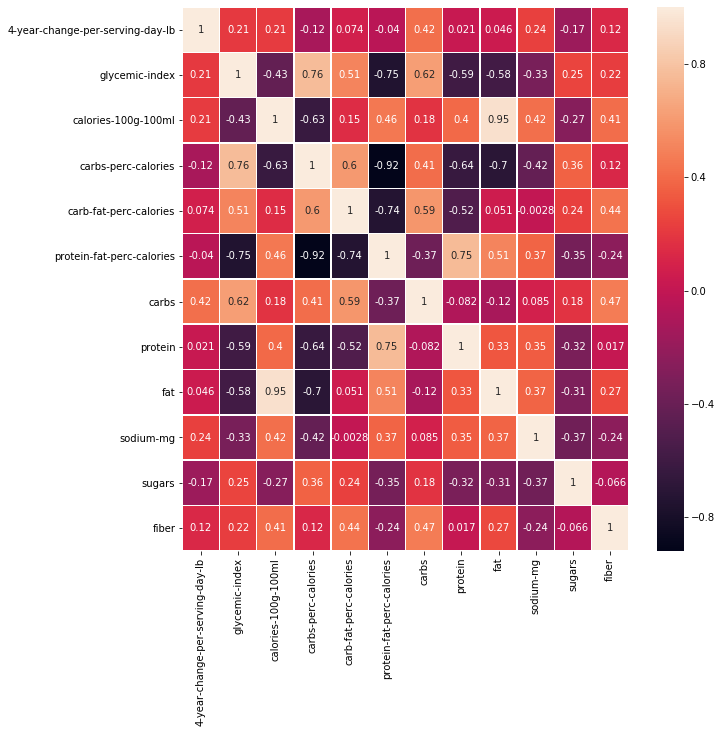

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

Median Values

In [26]:
df.describe()

,4-year-change-per-serving-day-lb,glycemic-index,calories-100g-100ml,carbs-perc-calories,carb-fat-perc-calories,protein-fat-perc-calories,carbs,protein,fat,sodium-mg,sugars,fiber
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.432353,38.529412,241.294118,0.508824,0.914706,0.315294,17.939412,6.618235,16.995294,259.294118,5.374706,1.541176
std,0.996434,27.267466,224.873510,0.382310,0.139916,0.186451,21.035183,7.028409,23.956035,321.959579,6.430340,1.894419
min,-0.820000,0.000000,41.000000,0.000000,0.630000,0.020000,0.060000,0.000000,0.170000,1.000000,0.000000,0.000000
25%,-0.220000,14.000000,61.000000,0.080000,0.800000,0.200000,5.000000,1.650000,1.040000,52.000000,0.480000,0.000000
50%,0.300000,39.000000,216.000000,0.530000,0.950000,0.280000,10.360000,3.410000,3.490000,76.000000,4.700000,1.200000
75%,0.930000,58.000000,323.000000,0.720000,0.990000,0.460000,14.650000,9.300000,22.200000,429.000000,9.170000,2.400000
max,3.350000,85.000000,717.000000,1.070000,1.180000,0.650000,74.420000,22.870000,81.110000,1140.000000,25.360000,6.700000


Seaborn plot

In [0]:
df_viz = df[["food","glycemic-index", "4-year-change-per-serving-day-lb", "carbs"]]

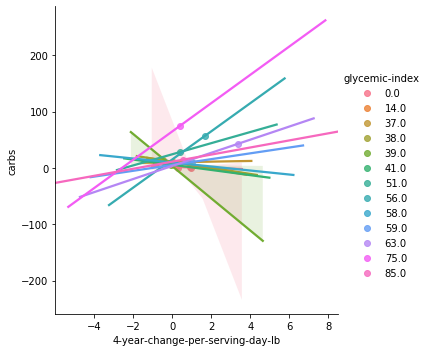

In [46]:
g = sns.lmplot(x="4-year-change-per-serving-day-lb", y="carbs", hue="glycemic-index",data=df_viz)

## Open Food Data EDA

In [20]:
import pandas as pd

open_food_df = pd.read_csv(
    "https://raw.githubusercontent.com/noahgift/food/master/data/features.en.openfoodfacts.org.products.csv")
open_food_df.drop(["Unnamed: 0", "exceeded", "g_sum", "energy_100g"], axis=1, inplace=True) #drop two rows we don't need
open_food_df = open_food_df.drop(open_food_df.index[[1,11877]]) #drop outlier
open_food_df.rename(index=str, columns={"reconstructed_energy": "energy_100g"}, inplace=True)
open_food_df.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product
0,28.57,64.29,14.29,3.57,0.00000,2267.85,Banana Chips Sweetened (Whole)
2,57.14,17.86,3.57,17.86,1.22428,2835.70,Organic Salted Nut Mix
3,18.75,57.81,15.62,14.06,0.13970,1953.04,Organic Muesli
4,36.67,36.67,3.33,16.67,1.60782,2336.91,Zen Party Mix
5,18.18,60.00,21.82,14.55,0.02286,1976.37,Cinnamon Nut Granola


### K-Means Clustering

In [0]:
import sklearn

## Conclusion

There doesn't appear to be widespread adoption of Data Science approach to some of the new things discovered in Nutritional Science in the last decade.

In looking at the NHS study and expanding it Nutritional components there are some clear patterns that emerge:

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3151731/
* https://fdc.nal.usda.gov/

A.  High Carbohydrate foods appear to be the strongest correlation with weight gain.

B.  Fat and Protein are essentially neutral

C.  Total Calories and glycemic index are equally as correlated with weight gain.

One firm conclusion would be to **avoid calorically dense, high carbohydrate foods that have a high glycemic index:  i.e. French Fries.  Sodium may also play a role here.**.

Follow up question?  Does this prove that "ultra-processed foods", which have this exact signature are one of the smoking guns of obesity?


